<a href="https://colab.research.google.com/github/oussemajebali/ProjetML/blob/main/ProjectDiabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style="color: blue; font-size: 2.5em; text-align: center;"><br>Project: Diabete</h1><br>



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

In [ ]:
#pip install xlrd


In [15]:
data = pd.read_csv('Diabetic.csv',delimiter=';')

# Préparation de données

In [4]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.shape

(101766, 50)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101662 non-null  float64
 1   patient_nbr               101648 non-null  float64
 2   race                      101671 non-null  object 
 3   gender                    101662 non-null  object 
 4   age                       101673 non-null  object 
 5   weight                    101647 non-null  object 
 6   admission_type_id         101658 non-null  float64
 7   discharge_disposition_id  101671 non-null  float64
 8   admission_source_id       101671 non-null  float64
 9   time_in_hospital          101676 non-null  float64
 10  payer_code                101650 non-null  object 
 11  medical_specialty         101679 non-null  object 
 12  num_lab_procedures        101663 non-null  float64
 13  num_procedures            101666 non-null  f

In [ ]:
data.dtypes

encounter_id                float64
patient_nbr                 float64
race                         object
gender                       object
age                          object
weight                       object
admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
time_in_hospital            float64
payer_code                   object
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              

In [7]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.016620e+05,1.016480e+05,101658.000000,101671.000000,101671.000000,101676.000000,101663.000000,101666.000000,101667.000000,101669.000000,101666.000000,101665.000000,101667.000000
mean,1.652007e+08,5.432981e+07,2.023766,3.714855,5.755112,4.396180,43.098443,1.339504,16.022288,0.369336,0.197834,0.635460,7.422369
std,1.026488e+08,3.869301e+07,1.445171,5.279478,4.063902,2.985095,19.673463,1.705539,8.127590,1.267229,0.930761,1.263006,1.933774
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.495889e+07,2.341309e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523747e+08,4.550581e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302670e+08,8.754619e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# DataCleaning

In [16]:
#to check if we have any emnty values  (NaN)
data.isna().values.any()

True

In [17]:
#Here to count how many nan values we have for each column
data.isna().sum()

encounter_id                  104
patient_nbr                   118
race                           95
gender                        104
age                            93
weight                        119
admission_type_id             108
discharge_disposition_id       95
admission_source_id            95
time_in_hospital               90
payer_code                    116
medical_specialty              87
num_lab_procedures            103
num_procedures                100
num_medications                99
number_outpatient              97
number_emergency              100
number_inpatient              101
diag_1                         99
diag_2                         90
diag_3                        100
number_diagnoses               99
max_glu_serum               96425
A1Cresult                   84769
metformin                      97
repaglinide                   103
nateglinide                    78
chlorpropamide                107
glimepiride                   106
acetohexamide 

In [ ]:
print(data.columns)


Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'medical_specialty_Surgery-General',
       'medical_specialty_Surgery-Maxillofacial',
       'medical_specialty_Surgery-Neuro',
       'medical_specialty_Surgery-Pediatric',
       'medical_specialty_Surgery-Plastic',
       'medical_specialty_Surgery-PlasticwithinHeadandNeck',
       'medical_specialty_Surgery-Thoracic',
       'medical_specialty_Surgery-Vascular',
       'medical_specialty_SurgicalSpecialty', 'medical_specialty_Urology'],
      dtype='object', length=150)


In [ ]:
print(data['readmitted'].unique())

['NO' '>30' '<30' nan]


In [ ]:
print(data.groupby('readmitted').size())

readmitted
<30    11342
>30    35507
NO     54810
dtype: int64


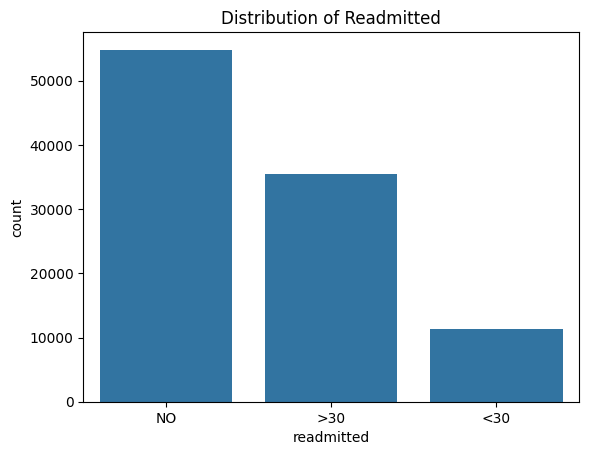

In [ ]:
import seaborn as sns

# Assuming 'readmitted' is your target column
sns.countplot(x='readmitted', data=data)
plt.title('Distribution of Readmitted')
plt.show()

In [10]:
#Il est nécessaire de vérifier si nous avons des valeurs en double.
duplicates = data.duplicated()


if duplicates.any():
    duplicate_rows = data[duplicates]
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicates found.")


No duplicates found.


<ipython-input-30-6e229399d7b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


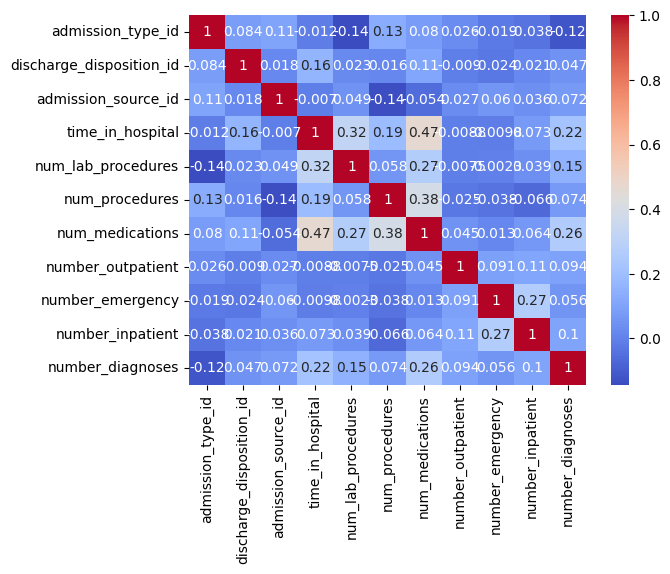

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [18]:
# Handling missing values for numerical columns
numerical_cols = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]  # Include all numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Handling missing values for categorical columns
categorical_cols = [
    'race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
    'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]  # Include all categorical columns

# Fill missing values in numerical columns with the mean
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Filter categorical columns that are present in the DataFrame
existing_categorical_cols = [col for col in categorical_cols if col in data.columns]

# Fill missing values in categorical columns with the mode
data[existing_categorical_cols] = data[existing_categorical_cols].fillna(data[existing_categorical_cols].mode())


In [19]:
data = pd.get_dummies(data, columns=existing_categorical_cols)



In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])






**KNN**

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)


# Create and fit the KNeighborsClassifier
k = 3  # You can choose a different value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_imputed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn_classifier.predict(X_test_imputed)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.4594674265500639
Classification Report:
               precision    recall  f1-score   support

         <30       0.13      0.17      0.15      2284
         >30       0.40      0.33      0.36      7113
          NO       0.58      0.60      0.59     10957

    accuracy                           0.46     20354
   macro avg       0.37      0.37      0.37     20354
weighted avg       0.47      0.46      0.46     20354



**SVM**





In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean from X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_imputed, y_train)


Decision Tree

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean from X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_imputed, y_train)


DecisionTreeClassifier()

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Predict using the trained Decision Tree model
y_pred = dt_model.predict(X_test_imputed)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8194949395696177
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90     18070
           1       0.16      0.15      0.15      2284

    accuracy                           0.82     20354
   macro avg       0.53      0.53      0.53     20354
weighted avg       0.81      0.82      0.82     20354



Gaussian Naive Bayes (GaussianNB)

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Split data into features (X) and target variable (y)
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean from X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply oversampling using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_imputed, y_train)

# Create and fit the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Predict using the trained Gaussian Naive Bayes model
y_pred = nb_model.predict(X_test_imputed)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)



Accuracy: 0.41210572860371425
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.39      0.54     18070
           1       0.11      0.62      0.19      2284

    accuracy                           0.41     20354
   macro avg       0.50      0.50      0.36     20354
weighted avg       0.80      0.41      0.50     20354



In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Predict using the trained Gaussian Naive Bayes model
y_pred = nb_model.predict(X_test_imputed)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8877861845337526
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18070
           1       0.00      0.00      0.00      2284

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.84     20354



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
